#### CISSE Cheikh M1 MAPI3

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
%matplotlib inline

from pandas.plotting import scatter_matrix

# plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

#### PROBLEMATIQUE:
Prédiction du prix des maisons à partir des données de la table

### Description des données

Notre table comporte 21 colonnes de 21613 lignes 

ID: Identifiant de chaque maison vendue 

DATE: date de vente des maison 

PRICE: prix de vente des maisons

BEDROOMS: nombres de chambres

BATHROOMS nombres de toilettes (=5 si la toilette n'a pas de douche)

SQFT_LIVING: nombres metres carrés de l'espace vivable de l'appartement

SQFT_LOT:nombre total de metres carré de l'appartement

FLOORS: nombres d'étages de l'appartement

WATERFRONT:une variable "dummy" pour indiquer si l'appartement est face de l'eau ou pas

VIEW: indice variant de 0 à 4 pour évaluer la vue

CONDITION: indice de 1 à 5 pour évaluer l'etat de l'appartement

GRADE: indice de 1 à 13 pour evaluer le niveau de standard de l'appartement (construction, design ...)

SQFT_ABOVE: le nombre de metres carrés de l'espace intérieur du logement qui est au dessus

SQFT_basement: le nombre de mettre carré de l'espace interieur du logement qui est en dessous

YR_BUILT: l'année de constuction de l'appartement

YR_RENOVATED: l'année de renovation de l'appartement

ZIPCODE: code postal de l'appartement

LAT_LATITUDE: la latitude de l'appartement

LONG_LONGITUDE: la longitude de l'appartement

SQFT_LIVING15: le nombre de mettre carrés de l'espace intérieur des 15 voisins les plus proches

SQFT_LOT15: le nombres de mettres carrés des terrains des 15 voisins les plus proches



### Lecture des données

In [221]:
# lecture du dataset
path = "~/tp/King_County_house_data/kc_house_data.csv"
def read(path):
    return pd.read_csv(path)
df=read(path)

In [222]:
# affichage de la tete du dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [223]:
# description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [224]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Annalyses et Explorations des données

In [225]:
# test de valeurs manquantes
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 on remarque qu'il n'y a pas de valeur manquant  dans le dataset.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

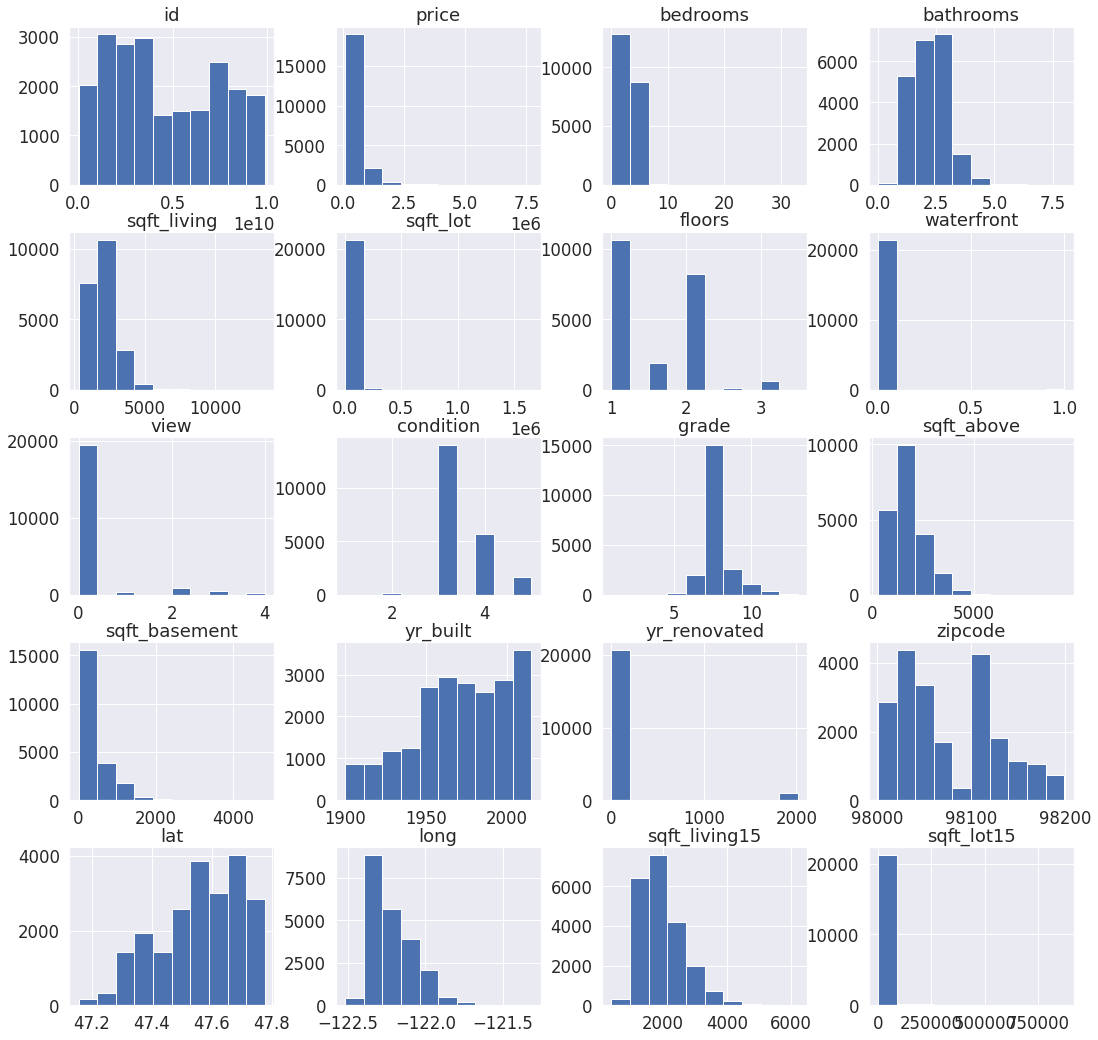

In [226]:
# Regardons brievement la distribution de nos variable.
df.hist(figsize=(18,18))

<AxesSubplot:>

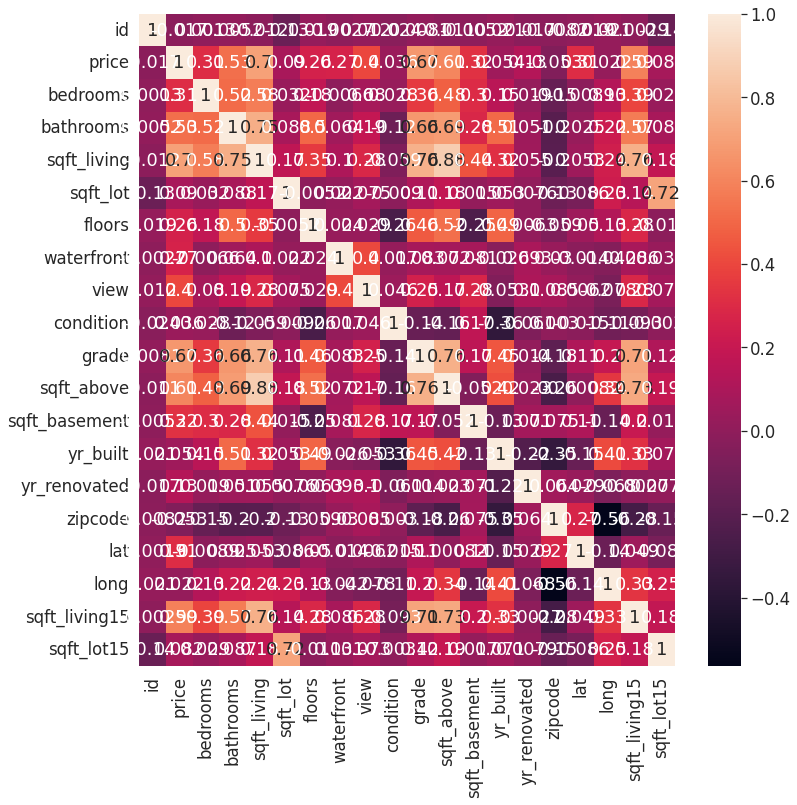

In [227]:
# matrices de correlations 
plt.figure(figsize = (12,12))
corr = df.corr()
sns.heatmap(corr, annot= True)

On procede a  la supression des colonnes ayant une tres faible correlation avec le prix (correlation < 0.1)

In [228]:
def drop(df):
    corr = df.corr()
    l = corr['price']
    L = []
    for i in l.index:
        if l[i] < 0.1:
            L.append(i)
    L.remove('long') #la situation geographique est important pour estimer le prix d'une maison nous allons donc garger la colonne long
#                     meme ayant une  faible corelation avec le prix.
    df.drop(L, axis = 1, inplace = True)
    return df
drop(df)
df.head() # le datasrl apres avoir suprimer les colonnes ayant de tres faible correlation avec le prix

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,-122.257,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,-122.319,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,-122.233,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,-122.393,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,-122.045,1800


#### Connaitre d'avantage les prix des maison

In [229]:
print("La maison la moin chere")
print(df['price'].min())
print("Le prix moyen des maisons")
print(df['price'].mean())

print("La maison la plus chere")
print(df['price'].max())
print("l' ecart type")
print(df['price'].std())

La maison la moin chere
75000.0
Le prix moyen des maisons
540088.1417665294
La maison la plus chere
7700000.0
l' ecart type
367127.19648269983


/home/bass/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


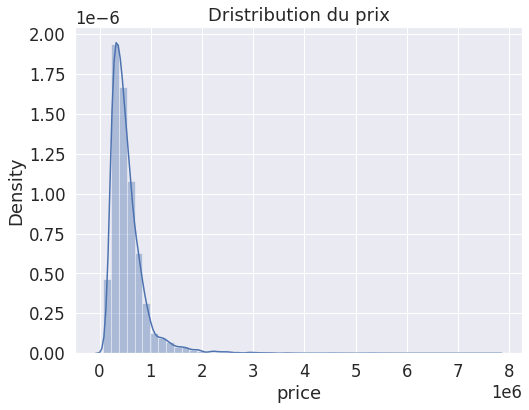

In [230]:
plt.figure(figsize = (8, 6))

plt.title('Dristribution du prix')
sns.distplot(df['price'])

plt.show()

On remarque que peu de maison on des prix eleves ( > 2 millions de dollars ). 

Une strategie (qui n'est pas la notre par ce que nous ne voulons pas dimunier le volume de donnees ) pourrait etre de 
supprimer ces maisons du dataset. 

/home/bass/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

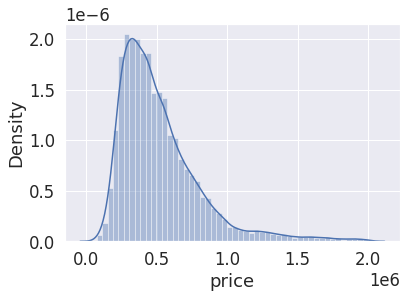

In [231]:
sns.distplot(df[df.price <= 2000000]['price']) #la distribution du prix  < 2 millions de dollars

#### Une appercu du prix en fonction des autres variable:

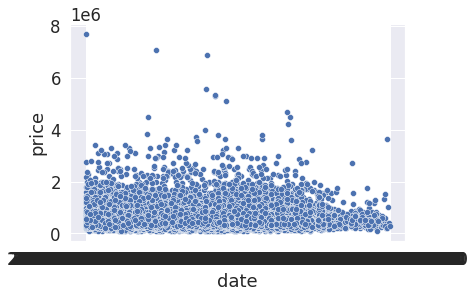

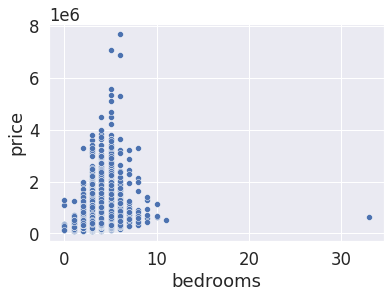

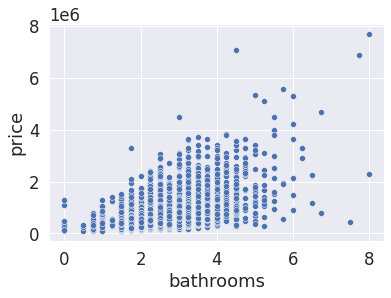

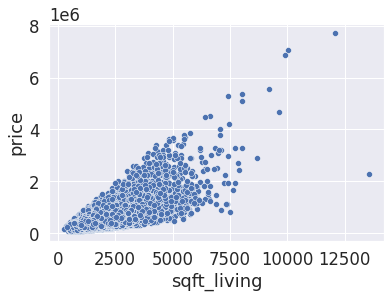

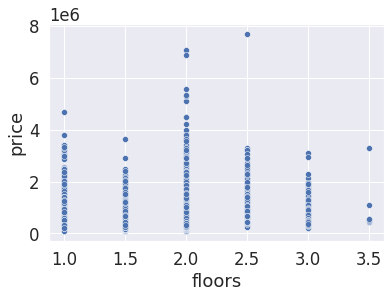

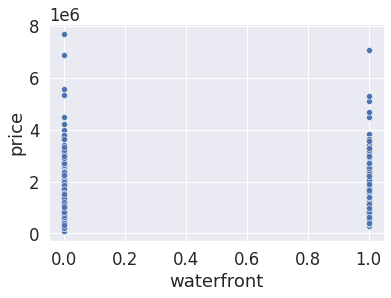

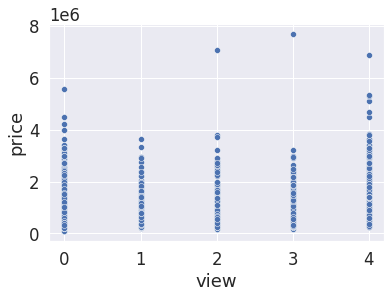

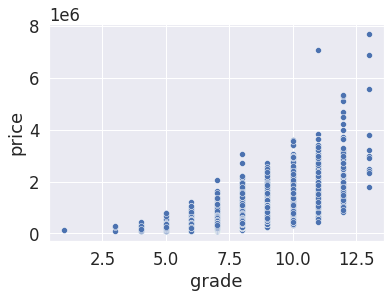

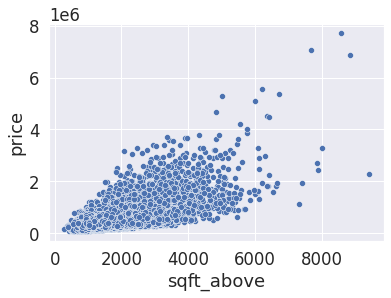

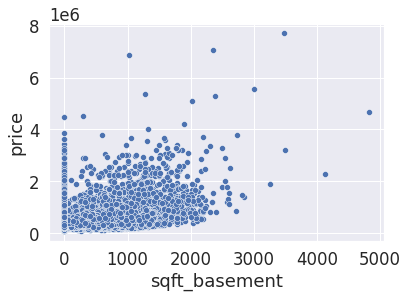

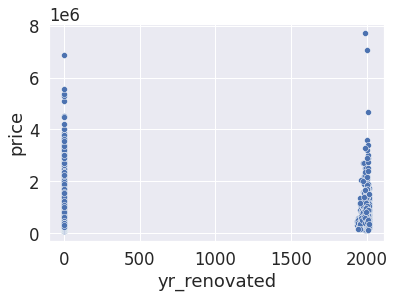

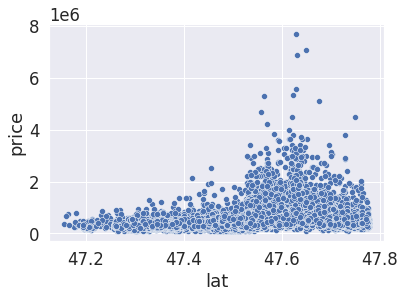

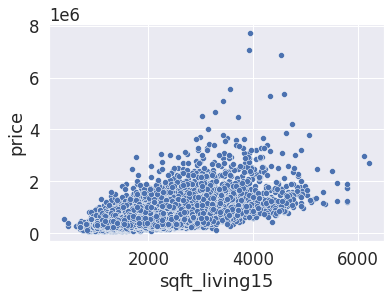

In [232]:
# Traçons le prix en fonction des autres variables
L  = list(df.columns)
Y = L[1] # price
L.remove("long",)
L.remove("price")
for X in L:
    sns.scatterplot(y=Y, x = X, data =df )
    plt.show()

#### Commentons un peu ces résultats

Courbe1: Prix en fonction de la date
Le prix reste quasiment uniforme en fonction de la date

Courbe2: Prix en fonction de bedrooms
les prix sont plus élevées autour des maisons de 05 bedrooms

Courbes3:Le prix en fonction des bathrooms
Le prix augmente presque linéaire avec les bathrooms

Courbe4: Le prix en fonction de sqft_living
Le prix augment linéairement avec le sqft_living

Courbe5: Le prix en fonction floors
Les floors impactent peu sur les prix

Courbe5:Le prix en fonction de waterfront
La présence de l'eau ou pas impacte peu sur le prix

Courbe6:Le prix en fonction de view
La visibilité impacte peu sur le prix

Courbe7:Le prix en fonction de grade
Plus y'a une bonne grade plus le pris est élevé


Courbe8:Le prix en fonction de sqft_above
Le prix évolue en fontion de sqft_above

Courbe9:Le prix en fonction de sqft_basement
Le prix évolue en fontion de sqft_basement

Courbe10:Le prix en fonction de yr_renovated
L'année de renovation ipacte peu sur le prix

Courbe11: Le prix en fonction de la latitude
Plus la latitude augmente plus le prix augmente

Courbe12: Le prix en fonction de sqft_living15
Le prix est quasi linéaire avec le sqft_living15

#### Bedrooms

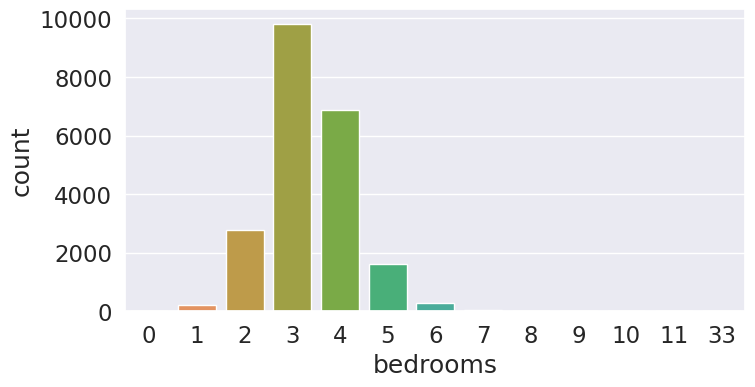

In [233]:
#  le nombre de bedrooms
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'bedrooms')
plt.show()

La majeure partie des maisons ont entre 3 et 4 chambres. Rares sont les maisons qui ont moin d'une chambre ou plus de 5 chambres

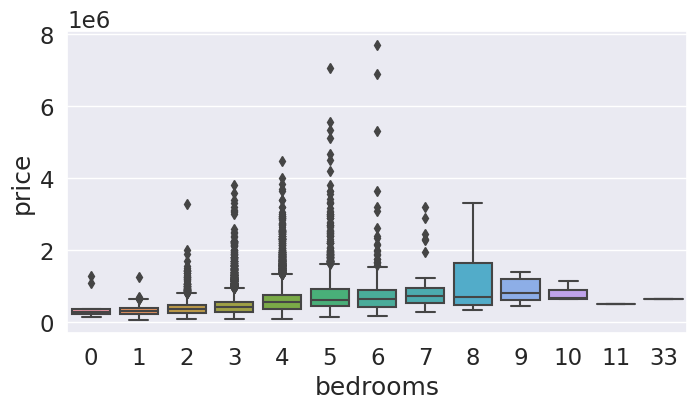

In [234]:
# bedrooms vs prie
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = 'bedrooms', y = 'price')
plt.show()


Les maisons les plus cheres ont en moyenne entre 4 et 7 chambres.

#### Bathrooms

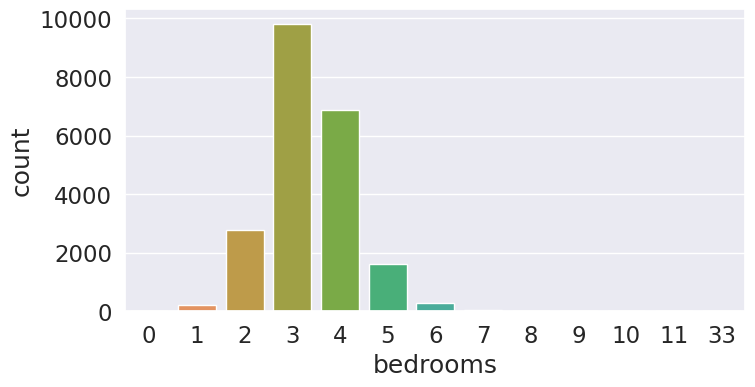

In [235]:
#  le nombre de bathrooms
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'bedrooms')
plt.show()

La majeure partie des maisons ont entre 3 et 4 bathrooms.

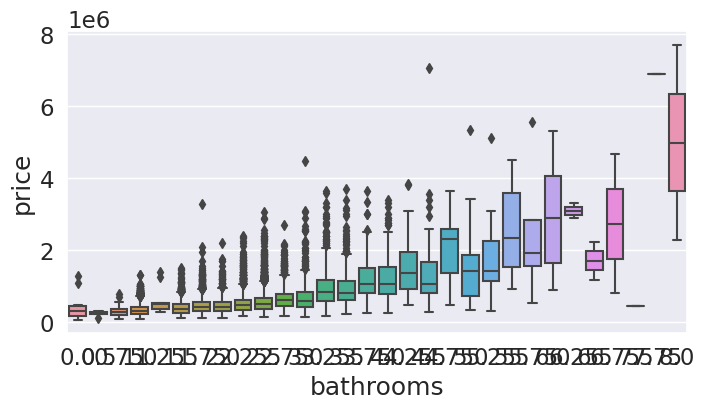

In [236]:
# bathrooms vs prie
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = 'bathrooms', y = 'price')
plt.show()

On peut dire quasiment que plus le nombres de bathrooms est important plus la maison coute chere.

#### Waterfront

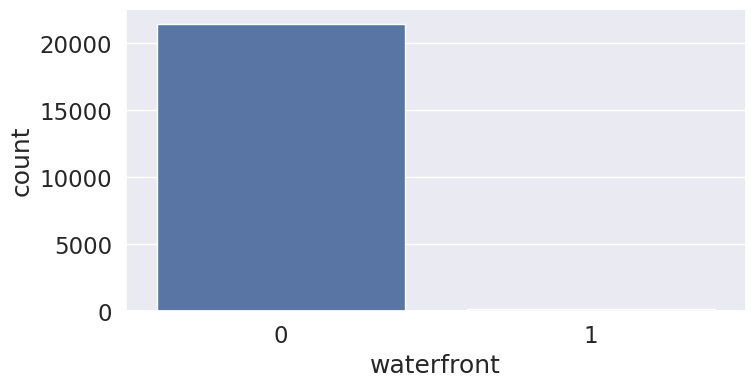

In [237]:
#  le nombre de maisons avec waterfront
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'waterfront')
plt.show()

Il ya peu de maisons avec une vue sur l'eau (waterfront)

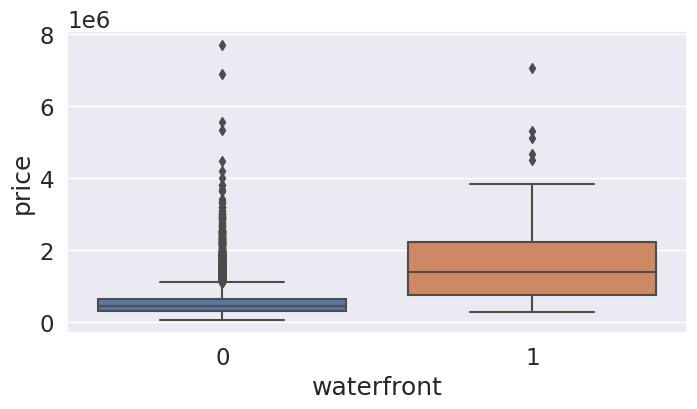

In [238]:
# price vs waterfront
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = 'waterfront', y = 'price')
plt.show()

Le prix des maisons avec waterfront ne sont pas forcement les plus cheres.

#### Grade

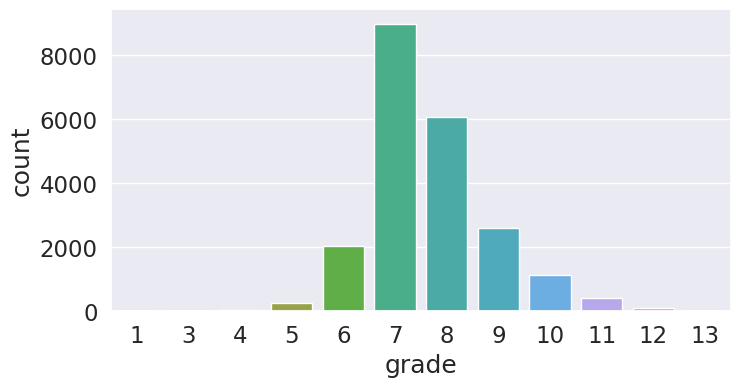

In [239]:
#  le standing des maisons
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = 'grade')
plt.show()

La majeure partie des maisons sont de standing moyen. Les maisons de tres hautes standing ne sont pas nombreuse.

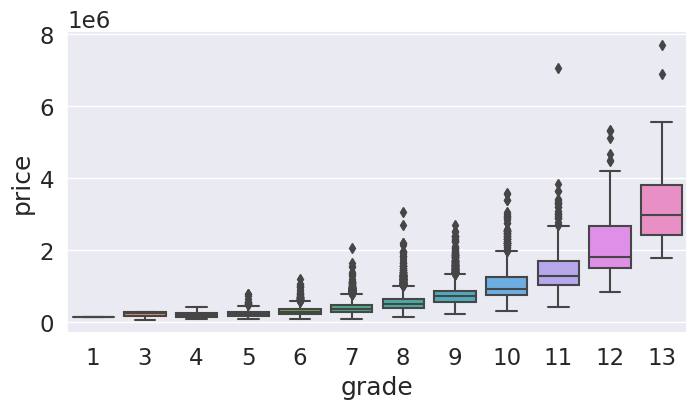

In [240]:
#grade vs price
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = 'grade', y = 'price')
plt.show()

plus le standing de la maison est elevé plus le prix est chere ce qui tres normal.

#### Lat, Long

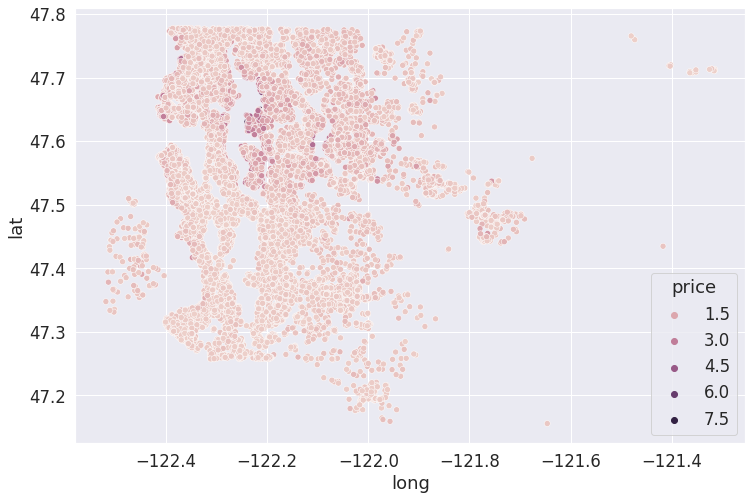

In [241]:
# display log asnd lat together
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
plt.show()

Les maisons ayant des prix cheres  sont dans des zones ayant une grande latitude. 

### Features ingeniering

In [242]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,-122.257,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,-122.319,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,-122.233,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,-122.393,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,-122.045,1800


#### Convertion de la date en datetime

In [243]:
#conversion la date en datetime
df['date'] = pd.to_datetime(df['date'])


In [244]:
#extraite la l'annee de la date.
df['year']=df['date'].apply(lambda x: x.year)
#data['month']=data['date'].apply(lambda x: x.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,year
0,2014-10-13,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,-122.257,1340,2014
1,2014-12-09,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,-122.319,1690,2014
2,2015-02-25,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,-122.233,2720,2015
3,2014-12-09,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,-122.393,1360,2014
4,2015-02-18,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,-122.045,1800,2015


In [245]:
#on supprime la colonne date apres avoir exrtait l'annee
df.drop('date',axis  = 1,inplace=True)

In [246]:
#On selectionne les features de la dataset
features = ["sqft_living15","sqft_living","sqft_above","sqft_basement","bathrooms","bedrooms","floors","grade","view","waterfront","yr_renovated","price","lat","long"]
df = df[features]

X = df.drop("price", axis = 1) # X est nos features (variables expllicatives)
y = df["price"] # y est notre label (variable a expliquer)


In [247]:
X.head()

,sqft_living15,sqft_living,sqft_above,sqft_basement,bathrooms,bedrooms,floors,grade,view,waterfront,yr_renovated,lat,long
0,1340,1180,1180,0,1.00,3,1.0,7,0,0,0,47.5112,-122.257
1,1690,2570,2170,400,2.25,3,2.0,7,0,0,1991,47.7210,-122.319
2,2720,770,770,0,1.00,2,1.0,6,0,0,0,47.7379,-122.233
3,1360,1960,1050,910,3.00,4,1.0,7,0,0,0,47.5208,-122.393
4,1800,1680,1680,0,2.00,3,1.0,8,0,0,0,47.6168,-122.045


<AxesSubplot:>

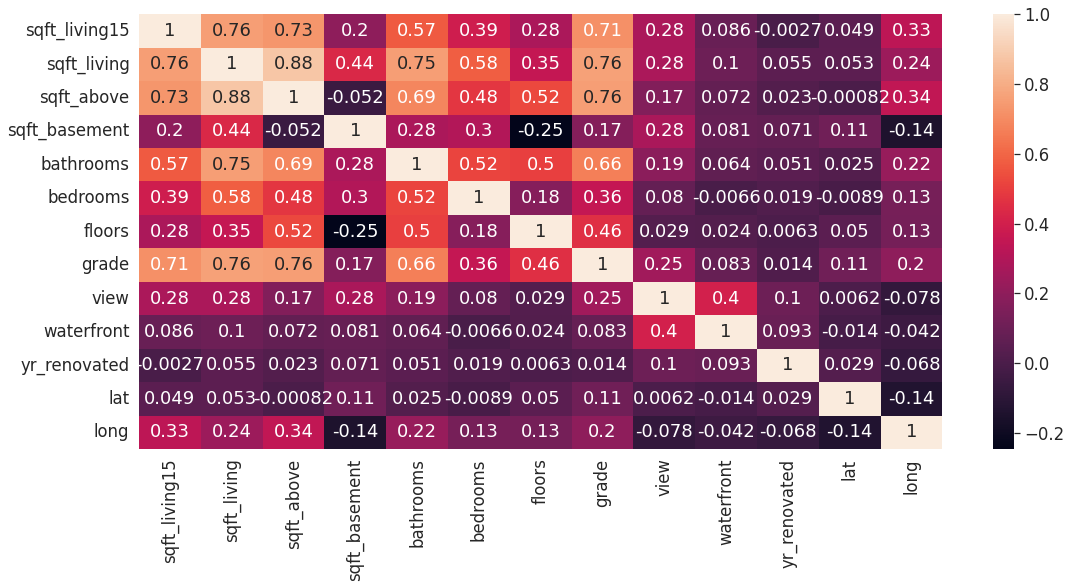

In [248]:
#on regarde s'il ya une multicolinearite des features 
corrX = X.corr()
plt.figure(figsize = (18,8))
sns.heatmap(corrX,annot = True, data = X)

On remarque que certains features on des correlations pas negligeable (parfois meme elevees) entre eux ceci pourrait negativement  avoir des repercussions sur notre score en regression lineaire (une des conditions d'application de la regression lineaire est une multicolinearite faible). On pourrait tenter de faire des "features extraction" : par exemple BATHROOMS et sqft_living ont une correlation de 0.74 on pourrait les remplacer par la variable quotient Bathrooms/Sqrt_living. 

Nous allons quand meme  les garder comme features.   

### Modelisation

In [249]:
#on va splitter notre dataset en gardant 20% pour le test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42) 

#scalling
#nous allons utiliser MinMaxScaler de sklearn,preprocessing
scaler = MinMaxScaler()
 
X_train= scaler.fit_transform(X_train) #application du scallig 
 
X_test = scaler.transform(X_test) #application du scaling

In [250]:
#regression lineaire
model = LinearRegression()
model.fit(X_train, y_train) #entraintement 
scores = cross_val_score(model, X_train,y_train,scoring="r2", cv = 5) #validation 
scores.mean()

0.6676255037721279

Nou avons un scores en enrainnement peu convaincant (R2 score : 0.66). Ceci est peut etre du au fait q'un modele de regression lineaire  n'est pas adequoit a notre dataset (condition d'application de la regression lineaire non verifies)  ou bien qu'il faut faire plus de features engineering.

Nous allons appliquer le model a nos donnees de test.

In [251]:
#fonction retournant l'erreir rmse
def rmse(y1,y2):
    return mean_squared_error(y1,y2)**.5
#fonction retournant la rmse a partir de la mse

In [252]:
#test
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred )
mse = rmse(y_pred,y_test)
print("R2 score : ",score)
print("RMSE: ", rmse(y_test, y_pred))

R2 score :  0.6741280665361058
RMSE:  221955.5079691798


Ces resultats sont peu satisfaisant. Ainsi cec modele ne pourrait etre deployer.
On va afficher les valeurs predits en fonctions de ceux reelles pour mieux illustrer l'inexactiture du model

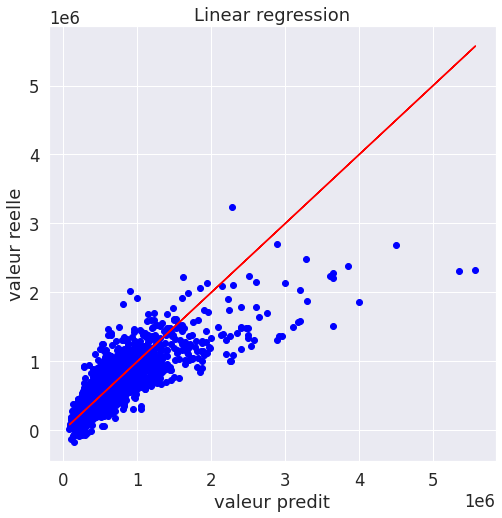

In [253]:
fig, ax1 = plt.subplots(figsize=(8,8))
plt.scatter(y_test,y_pred,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('Linear regression')
plt.xlabel('valeur predit')
plt.ylabel('valeur reelle')
plt.show()

On constante une deviation des donnees par rapport a  la droite lineaire.

Nous allons maintenant essayer une regression polynomiale et un modele ridge. On espere avoir des resultats meilleurs. 

In [254]:
#Regression Polynomiale
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42) 

#application du polynome de degree 2 sans biais
poly = PolynomialFeatures(degree=2, include_bias=False) 
X_train = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# cross validation
scores = cross_val_score(poly_model, X_train,y_train,scoring="r2", cv = 5)
scores.mean()

0.7782017456165304

Un score de 0.77 mieux que la regression lineaire simple

In [255]:
#test avec regression polynimiale
X_test = poly.fit_transform(X_test)
y_pred = poly_model.predict(X_test)
score = r2_score(y_test, y_pred )
rmse = rmse(y_pred,y_test)
print("R2 score : ",score)
print("RMSE: ", rmse)

R2 score :  0.7624559387755331
RMSE:  189502.3223922503


On a un score en test beaucoup mieux avec la regression polynomiale (0.77) mais pas encore suffisant pour un deploiement.

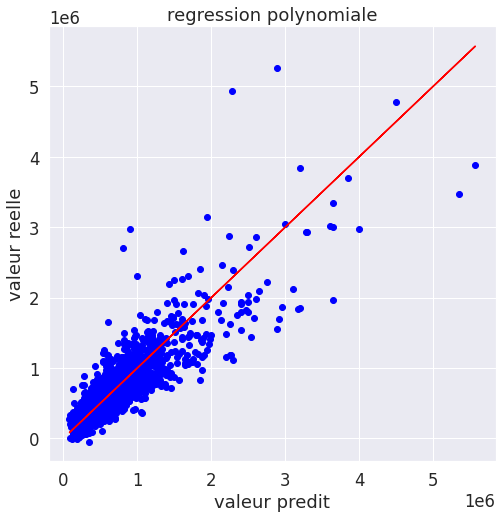

In [256]:
#plot prediction et valeur reelle
fig, ax1 = plt.subplots(figsize=(8,8))
plt.scatter(y_test,y_pred,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('regression polynomiale')
plt.xlabel('valeur predit')
plt.ylabel('valeur reelle')
plt.show()

La linearite est cette fois ci constatee.

Nous allons essayer le modele rigde regression ci dessous.

In [257]:
#Ridge Model
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42) 
pr=PolynomialFeatures(degree=2)
X_train=pr.fit_transform(X_train)
X_test=pr.fit_transform(X_test)
Ridge_Model=Ridge(alpha=0.1)
Ridge_Model.fit(X_train,y_train)
Ridge_Model.score(X_test,y_test)

0.7600735777431882

Le modele ridge ne fait pas mieux que la regression polynomiale mais affiche quand meme un score de 0.76 en test ce qui n'est pas mal.

Les regression polynomiale et ridge sont un peu plus preci que la regression simple mais les resultat reste quand meme insatisfaisante. Nous allons essayer avec le modele Extreme Gradient Boosting XGBOOST (C'est un modele ensembliste plus complexes et efficaces que les methodes de regression simple ). C'est un model complexe qui appliquees avec les  meilleur hyperparametres peut donner des resultats interressant.
Pour en savoir plus : https://en.wikipedia.org/wiki/Gradient_boosting

Le choix des hyperparametres est une tache tres difficile qui prend beaucoup de temps. Il consiste donner une ensemble de parametrre a notre modele et de retourner les meilleurs parametres. Nour allons utiliser GridSearchCV de sklearn.ensemble pour faire le "hyperparameters tunnig"


On pourrait utiliser d'autres ensemblibliste predefinie dans sklearn comme random forest etc mais nous voullons un maximum de precision c'est pourquoi nous avons decider d'utiliser le XGBOOST.

Pour l'installer  il faut faire : pip install xgboost 

In [202]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict
#!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [258]:
#Ici nous allons faire du "hyperparametres Tuning" pour selections les meilleurs parametres de notre
# notre modele assembliste XGboost.
#Dans le dictionnaire param_tunning nous donnons une liste de parametre et le gridsearchcv retourne le meilleur parmis eux.
def hyperParametreTuning(X, y):
    param_tuning = {
        #'tree_method': ['gpu_hist'],
        'learning_rate': [0.01, 0.1], 
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model, #notre modele
                           param_grid = param_tuning,    #nous allons donner nos parametre au Gridsearchcv                    
                           
                           scoring = 'neg_mean_squared_error', #le type d'erreur  MSE pour nous
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X,y) #applications du gridsearchcv
    return gsearch.best_params_ #retourne les meilleurs hyperparametres

In [260]:
#hyperParametreTuning(X, y) 

Nous avons compiles le hyperParamatreTunning et avons selectionnes les hyperparametres de notre modele. La compilation prend ennormement de temps c'est pourquoi nous l'avons mis en commentaire. 
Les hyperparametres de notre modele xgboost sont ci dessous.

In [261]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
# XGBOOST MODEL
# #Nos hypermapametres :
#    learning_rate = 0.01,
#     max_depth = 7,
#     min_child_weight = 5,
#     n_estimators = 500,
#     objective = 'reg:squarederror',
#     subsample= 0.5
xgb_model = XGBRegressor(colsample_bytree = 0.5,
 learning_rate = 0.01,
 max_depth = 7,
 min_child_weight = 5,
 n_estimators = 500,
 objective = 'reg:squarederror',
 subsample= 0.5)
model = xgb_model.fit(X_train, y_train)

In [263]:
y_pred= model.predict(X_test)

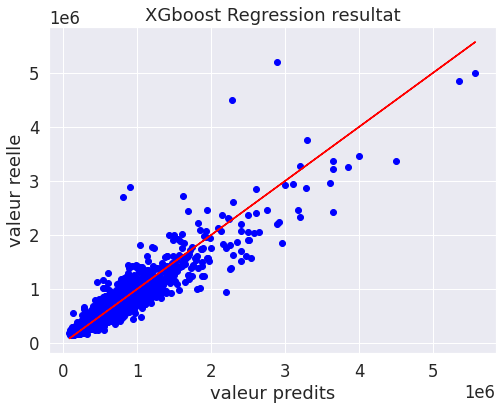

In [264]:
# valeur relle vs valeur predits

fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('XGboost Regression resultat')
plt.xlabel('valeur predits')
plt.ylabel('valeur reelle')
plt.show()

Nous avons des resultats nettement meilleurs. Regardons le score.

In [265]:
#Cross-Validation
#le dictionnaires ci dessous prend  differentes type de test MSE, R2, MAE
scoring = {'MSE' : make_scorer(mean_squared_error),
          'MAE' : make_scorer(mean_absolute_error),
           'R2' : make_scorer(r2_score)
          }
kfold = KFold(n_splits=5, random_state=1234, shuffle = True) # kfold est un parametre de notre cross validation ci dessous

#application cross validation
results_reg = cross_validate(estimator=xgb_model,X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
results_reg

{'fit_time': array([5.06644678, 3.93667555, 4.11653209, 4.07749152, 4.07344508]),
 'score_time': array([0.01511931, 0.01375198, 0.01405787, 0.01790595, 0.01547527]),
 'test_MSE': array([1.85585995e+10, 1.70101129e+10, 1.90385706e+10, 1.48073457e+10,
        1.52663514e+10]),
 'test_MAE': array([74045.25307223, 75287.6894843 , 77788.16585704, 73307.59578537,
        72392.49499653]),
 'test_R2': array([0.85888753, 0.87385931, 0.86522251, 0.88829421, 0.88577786])}

In [266]:
rmse = np.sqrt(results_reg.get('test_MSE'))
mae = (results_reg.get('test_MAE'))
r2 = (results_reg.get('test_R2'))
print('mean_RMSE : ', "%.15f" % (rmse.mean()))
print('mean_MAE : ', "%.15f" % (mae.mean()))
print('mean_R2 : ', "%.15f" % (r2.mean()))

mean_RMSE :  129975.123213263927028
mean_MAE :  74564.239839094690979
mean_R2 :  0.874408284673539


Nous avons maintenant un score de  87,44%. 

Un bon score  !!!

Nous modele pourrait donc etre deployer .

### CLUSTERING

#### Nous allons classer les maisons suivant le prix et le sqft living.

In [267]:
column_1 = 'price'
column_2 = 'sqft_living15'
data = df[[column_1, column_2]]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


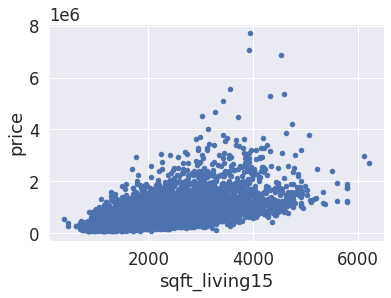

In [268]:
data.plot.scatter(x=column_2,y=column_1);

In [269]:
from sklearn.cluster import KMeans

 Pour ne pas avoir un underfitting ou un overfitting, nous allons untiliser la corbe "Elbow plot"

In [270]:
k_values = range(1, 10)
k_mean_models = [KMeans(n_clusters=i) for i in k_values]
scores = [-k_mean_models[i].fit(data).score(data)for i, model in enumerate(k_mean_models)]

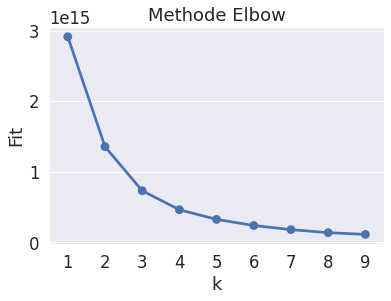

In [271]:
ax = sns.pointplot(x=list(k_values),y=scores);
ax.set(xlabel='k',ylabel='Fit',title='Methode Elbow');

In [272]:
kmeans = KMeans(n_clusters=3) # on choisit 3 clusters
kmeans.fit(data);

In [273]:
data['kmeans_labels'] = kmeans.labels_

/tmp/ipykernel_590/2651889080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kmeans_labels'] = kmeans.labels_


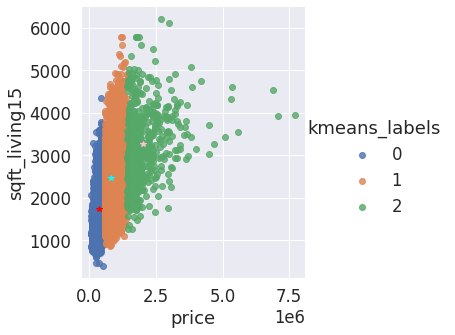

In [274]:
kmeans_plot = sns.lmplot(x=column_1,y=column_2,data=data,fit_reg=False,hue="kmeans_labels",legend=True);

kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans. cluster_centers_[0][1], color='red', marker='*');

kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans. cluster_centers_[1][1], color='cyan', marker='*');

kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans. cluster_centers_[2][1], color='pink', marker='*');